In [1]:
from dataset import *
from train import *

import matplotlib.pyplot as plt

import torch, torchvision
import torchvision.transforms as transforms

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
batch_size = 32


train_transform = transforms.Compose([
    transforms.Resize(256), transforms.RandomCrop((224, 400)),
    transforms.ToTensor(), transforms.Normalize(mean=[0.3005, 0.3035, 0.2712], std=[0.1519, 0.1252, 0.0996])])

val_transform = transforms.Compose([
    transforms.Resize(256), transforms.CenterCrop((224, 400)),
    transforms.ToTensor(), transforms.Normalize(mean=[0.3005, 0.3035, 0.2712], std=[0.1519, 0.1252, 0.0996])])


train_dataset = TrainDataset(transform=train_transform)
val_dataset = ValDataset(transform=val_transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [4]:
model = Baseline(model='resnet18', num_classes=157, save=True)

In [5]:
epochs = 7
lr = 0.0005
weight_decay = 0.00001

In [6]:
model.train(train_loader, val_loader, epochs=epochs, lr=lr, weight_decay=weight_decay)

Epoch 1 Started...
Best Model Saved
Iteration : 1 - Train Loss : 5.249459, Test Loss : 5.109067, Train Acc : 0.000000, Test Acc : 2.864939
Best Model Saved
Iteration : 11 - Train Loss : 4.031849, Test Loss : 4.672749, Train Acc : 31.250000, Test Acc : 12.960437
Best Model Saved
Iteration : 21 - Train Loss : 3.815476, Test Loss : 3.549507, Train Acc : 25.000000, Test Acc : 23.465211
Best Model Saved
Iteration : 31 - Train Loss : 3.064058, Test Loss : 2.919316, Train Acc : 43.750000, Test Acc : 41.746248
Best Model Saved
Iteration : 41 - Train Loss : 2.386063, Test Loss : 2.553350, Train Acc : 46.875000, Test Acc : 42.769441
Best Model Saved
Iteration : 51 - Train Loss : 1.837353, Test Loss : 1.901541, Train Acc : 65.625000, Test Acc : 54.365621
Best Model Saved
Iteration : 61 - Train Loss : 1.884588, Test Loss : 1.891347, Train Acc : 68.750000, Test Acc : 61.050477
Best Model Saved
Iteration : 71 - Train Loss : 1.823428, Test Loss : 1.497376, Train Acc : 50.000000, Test Acc : 67.189632


Iteration : 11 - Train Loss : 0.034810, Test Loss : 0.098241, Train Acc : 100.000000, Test Acc : 98.431105
Iteration : 21 - Train Loss : 0.022537, Test Loss : 0.050641, Train Acc : 100.000000, Test Acc : 98.635744
Iteration : 31 - Train Loss : 0.027258, Test Loss : 0.066125, Train Acc : 100.000000, Test Acc : 99.113233
Iteration : 41 - Train Loss : 0.018709, Test Loss : 0.032934, Train Acc : 100.000000, Test Acc : 99.727149
Iteration : 51 - Train Loss : 0.009295, Test Loss : 0.062938, Train Acc : 100.000000, Test Acc : 98.976808
Iteration : 61 - Train Loss : 0.026969, Test Loss : 0.056482, Train Acc : 100.000000, Test Acc : 98.976808
Iteration : 71 - Train Loss : 0.020239, Test Loss : 0.103091, Train Acc : 100.000000, Test Acc : 97.953615
Iteration : 81 - Train Loss : 0.232048, Test Loss : 0.071007, Train Acc : 96.875000, Test Acc : 98.158254
Iteration : 91 - Train Loss : 0.021449, Test Loss : 0.025679, Train Acc : 100.000000, Test Acc : 99.386085
Iteration : 101 - Train Loss : 0.15773

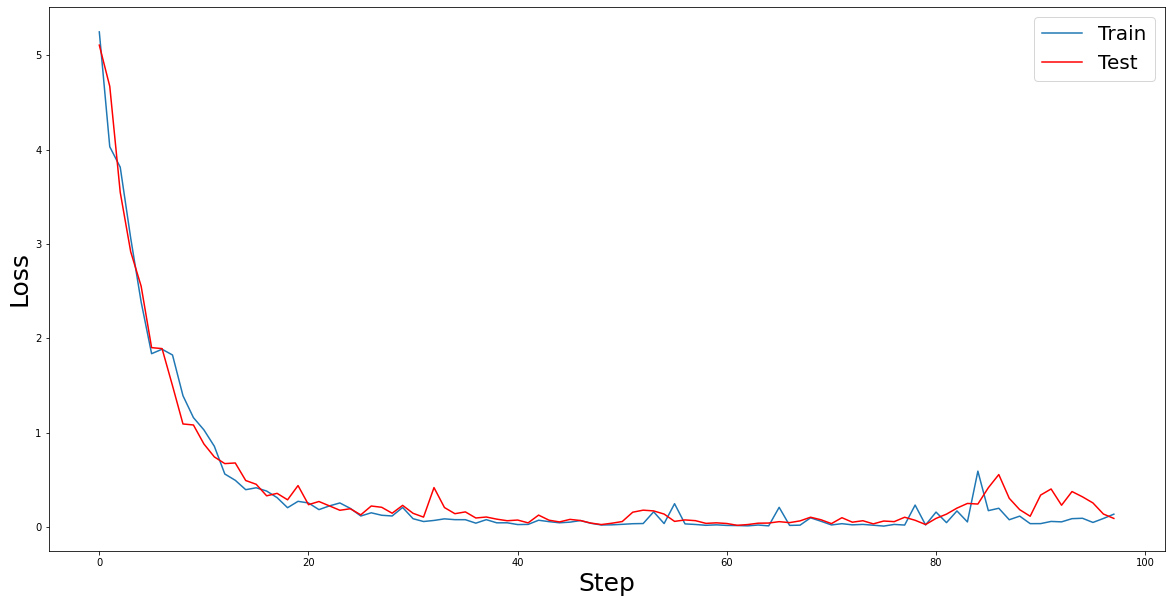

In [7]:
label_fontsize = 25

plt.figure(figsize=(20, 10))
train_lossline, = plt.plot(model.train_losses, label='Train')
test_lossline, = plt.plot(model.test_losses, color='red', label='Test')
plt.legend(handles=[train_lossline, test_lossline], fontsize=20)
plt.xlabel('Step', fontsize=label_fontsize)
plt.ylabel('Loss', fontsize=label_fontsize)
plt.show()

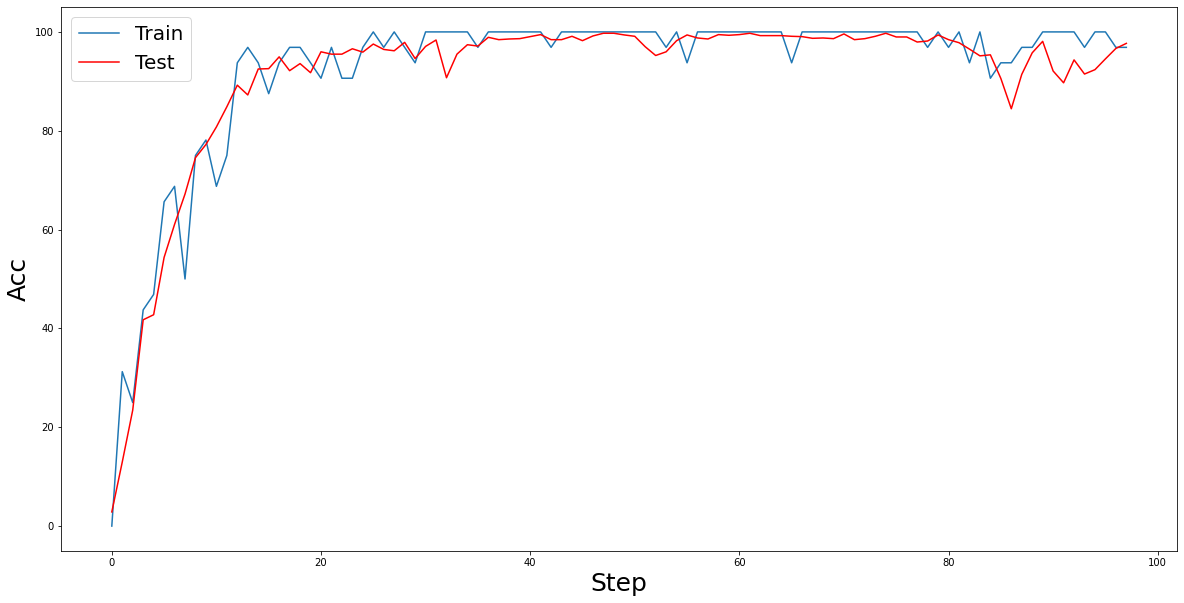

In [8]:
plt.figure(figsize=(20, 10))
train_accline, = plt.plot(model.train_acc, label='Train')
test_accline, = plt.plot(model.test_acc, color='red', label='Test')
plt.legend(handles=[train_accline, test_accline], fontsize=20)
plt.xlabel('Step', fontsize=label_fontsize)
plt.ylabel('Acc', fontsize=label_fontsize)
plt.show()